In [ ]:
# Maria Asghar
# Spring_2022_Machine_Leaning
# Assignment_2_CNN

In [1]:
import numpy as np
import os
import cv2
from random import shuffle
from tqdm import tqdm

TRAIN_DIR = 'F:/ML/Assignment_2/cats_vs_dogs/train'
TEST_DIR = 'F:/ML/Assignment_2/cats_vs_dogs/test'
IMG_SIZE = 50
LR = 1e-3

MODEL_NAME = 'dogsvscats-{}-{}.model'.format(LR,'2conv-basic')

In [2]:
MODEL_NAME

'dogsvscats-0.001-2conv-basic.model'

In [ ]:
.cat.4858.png

In [7]:
def label_img(img):
    word_label = img.split('.')[-3]            
    if word_label == 'cat': return [1, 0]                   
    elif word_label == 'dog': return [0, 1]

In [8]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR, img)
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (IMG_SIZE, IMG_SIZE))
        training_data.append([np.array(img), np.array(label)]) 
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data

In [9]:
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR, img)
        img_num = img.split('.')[0]
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (IMG_SIZE, IMG_SIZE))
        testing_data.append([np.array(img), img_num])  
    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data

In [10]:
train_data = create_train_data()

100%|██████████| 25000/25000 [00:26<00:00, 944.84it/s] 
c:\Users\Sheri Sahoo\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\npyio.py:518: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [11]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

In [13]:
train = train_data[:-500]
test = train_data[-500:]

In [14]:
X = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
test_y = [i[1] for i in test]

In [15]:
model.fit({'input': X}, {'targets': Y}, n_epoch=3, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 1148  | total loss: 11.67754 | time: 42.665s
| Adam | epoch: 003 | loss: 11.67754 - acc: 0.4929 -- iter: 24448/24500
Training Step: 1149  | total loss: 11.44521 | time: 43.781s
| Adam | epoch: 003 | loss: 11.44521 - acc: 0.5029 | val_loss: 11.42082 - val_acc: 0.5040 -- iter: 24500/24500
--


In [16]:
import tensorflow as tf
tf.compat.v1.reset_default_graph()

convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')

In [17]:
if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

In [18]:
train = train_data[:-500]
test = train_data[-500:]

In [19]:
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = [i[1] for i in test]

In [20]:
model.fit({'input': X}, {'targets': Y}, n_epoch=3, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 1148  | total loss: 0.47020 | time: 43.517s
| Adam | epoch: 003 | loss: 0.47020 - acc: 0.7658 -- iter: 24448/24500
Training Step: 1149  | total loss: 0.47059 | time: 44.628s
| Adam | epoch: 003 | loss: 0.47059 - acc: 0.7674 | val_loss: 0.47131 - val_acc: 0.7680 -- iter: 24500/24500
--


In [21]:
model.save(MODEL_NAME)

INFO:tensorflow:f:\ML\Assignment_2\dogsvscats-0.001-2conv-basic.model is not in all_model_checkpoint_paths. Manually adding it.
INFO:tensorflow:f:\ML\Assignment_2\dogsvscats-0.001-2conv-basic.model.data-00000-of-00001
INFO:tensorflow:6600
INFO:tensorflow:f:\ML\Assignment_2\dogsvscats-0.001-2conv-basic.model.index
INFO:tensorflow:6600
INFO:tensorflow:f:\ML\Assignment_2\dogsvscats-0.001-2conv-basic.model.meta
INFO:tensorflow:6800


In [22]:
import tensorflow as tf
tf.compat.v1.reset_default_graph()

convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')

In [23]:
if os.path.exists('F:/ML/Assignment_2.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

In [24]:
train = train_data[:-500]
test = train_data[-500:]

In [25]:
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = [i[1] for i in train]

In [26]:
test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = [i[1] for i in test]

In [27]:
model.fit({'input': X}, {'targets': Y}, n_epoch=10, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 3829  | total loss: 0.39982 | time: 45.366s
| Adam | epoch: 010 | loss: 0.39982 - acc: 0.8190 -- iter: 24448/24500
Training Step: 3830  | total loss: 0.39614 | time: 46.472s
| Adam | epoch: 010 | loss: 0.39614 - acc: 0.8137 | val_loss: 0.48617 - val_acc: 0.7700 -- iter: 24500/24500
--


In [ ]:
model.save(MODEL_NAME)

100%|██████████| 12500/12500 [00:13<00:00, 920.46it/s]
c:\Users\Sheri Sahoo\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\npyio.py:518: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


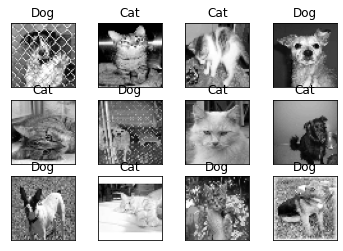

In [29]:
import matplotlib.pyplot as plt

# if you need to create the data:
test_data = process_test_data()
# if you already have some saved:
#test_data = np.load('test_data.npy')

fig=plt.figure()

for num, data in enumerate(test_data[:12]):
    # cat: [1,0]
    # dog: [0,1]
    
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(3, 4, num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
 
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: str_label='Dog'
    else: str_label='Cat'
        
    y.imshow(orig, cmap ='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

plt.show()

In [30]:
with open('submission_file.csv','w') as f:
    f.write('id,label\n')

In [31]:
with open('submission_file.csv','a') as f:
    for data in tqdm(test_data):
        img_num = data[1]
        img_data = data[0]
        orig = img_data
        data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
        model_out = model.predict([data])[0]
        f.write('{},{}\n'.format(img_num, model_out[1]))

100%|██████████| 12500/12500 [00:19<00:00, 650.51it/s]
